# Coding Section 3: Intro to Regression Discontinuity Designs
## Econ 130
GSIs: Richard Calvo and Julia Paris

### Goals for today
* Examine some summary statistics in small groups
* Plot a RDD using the `rdplot` command from the `rdrobust` package

## A few quick notes on the context (see the Section worksheet for more details)
* Schools need buildings. They are typically funded by school districts issuing bonds: debt obligations that are paid back through increases in property taxes
* Typically this is voted on because property taxes need to be used to fund them.
* These are real data from an ongoing project by Professor Lafortune with Barbara Biasi (Yale) and David Schoenholzer (Stockholm University; UCB PhD 2018)

In [ ]:
rm(list = ls())
## We will use rdrobust to help us plot the RDD. 
## It was preinstalled by us on Datahub, so you don't need to run the install.packages command first.
library(rdrobust)

## Read in the data
## As before, refer to the codebook to learn what is contained in each variable
raw_data <- read.csv("school_bonds.csv")

In [ ]:
## We want to keep a bandwidth of -0.15 to 0.15
## The threshold is zero.
## We will save this dataset.

narrow_data <- raw_data[which(raw_data$margin >= -0.15 & raw_data$margin <= 0.15),]

write.csv(narrow_data, "school_bonds_narrow.csv")

## Some checks prior to running the RDD
Recall in lecture we talked about certain tests to run on the data so that we can have confidence that a RDD is an appropriate research design in this case. We will investigate:
1. Did school districts actually follow the rules regarding bond passage? ("Compliance")
2. Are there any signs of manipulation around the threshold? ("Manipulation")
3. Do districts where bond passage barely passed truly resemble districts where bond passage barely failed? ("Covariate Balance")

In [ ]:
## 1. Compliance
## What are the values of passbond above and below the margin? 
## What should they be if compliance is perfect?

table(narrow_data[which(narrow_data$margin >0),]$passbond)
table(narrow_data[which(narrow_data$margin <=0),]$passbond)


   1 
3364 


   0 
1532 

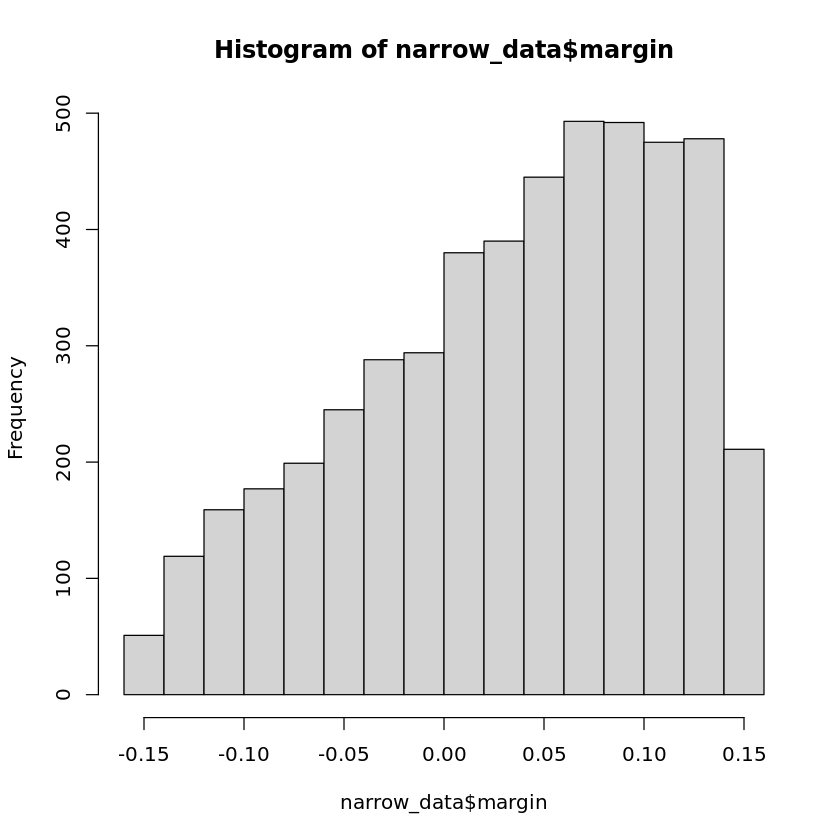

In [ ]:
## 2. Manipulation
## Let's plot a histogram. Does anything look weird around the threshold?

hist(narrow_data$margin)

In [ ]:
## "Covariate Balance": let's check the following:
## Do the means below and above the threshold (passbond == 1 and passbond == 0) look close?
## Check this for both spending variables one year before the election
## (l1cap_exp and l1noncap_exp). 
## Hint: use the `which` function like I did in the table example above.
## Are the means similar? What are the pros and cons of this method?

## Your code here:


## Plotting the RDD

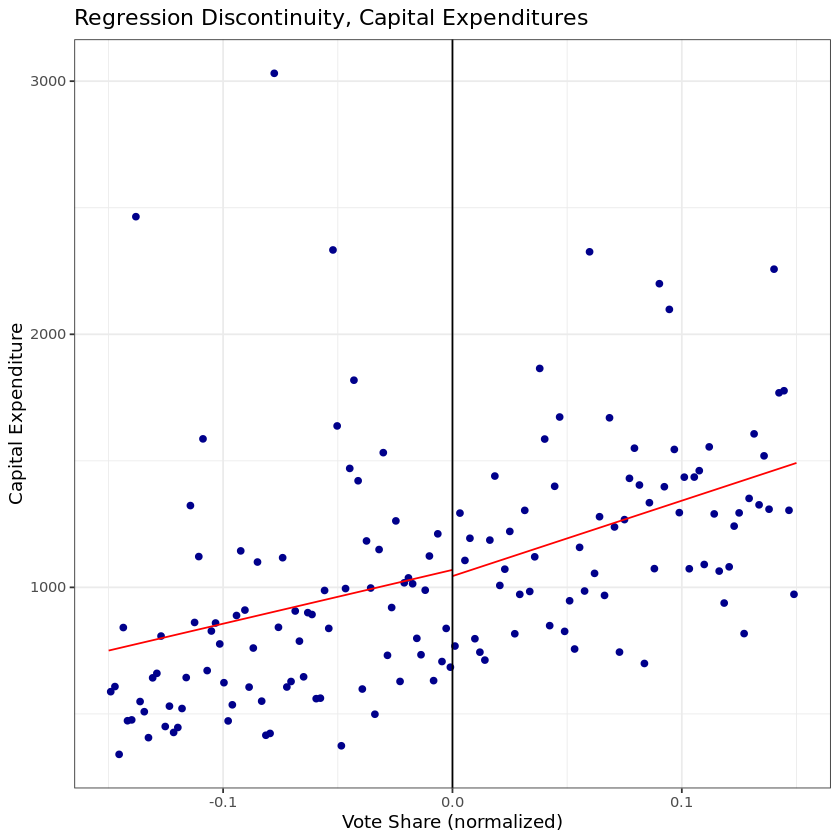

In [ ]:
## Let's plot capital expenditure:

rdplot(y = narrow_data$cap_exp, x = narrow_data$margin, c=0, p=1, 
       x.label = "Vote Share (normalized)", 
       y.label = "Capital Expenditure", 
       title = "Regression Discontinuity, Capital Expenditures")

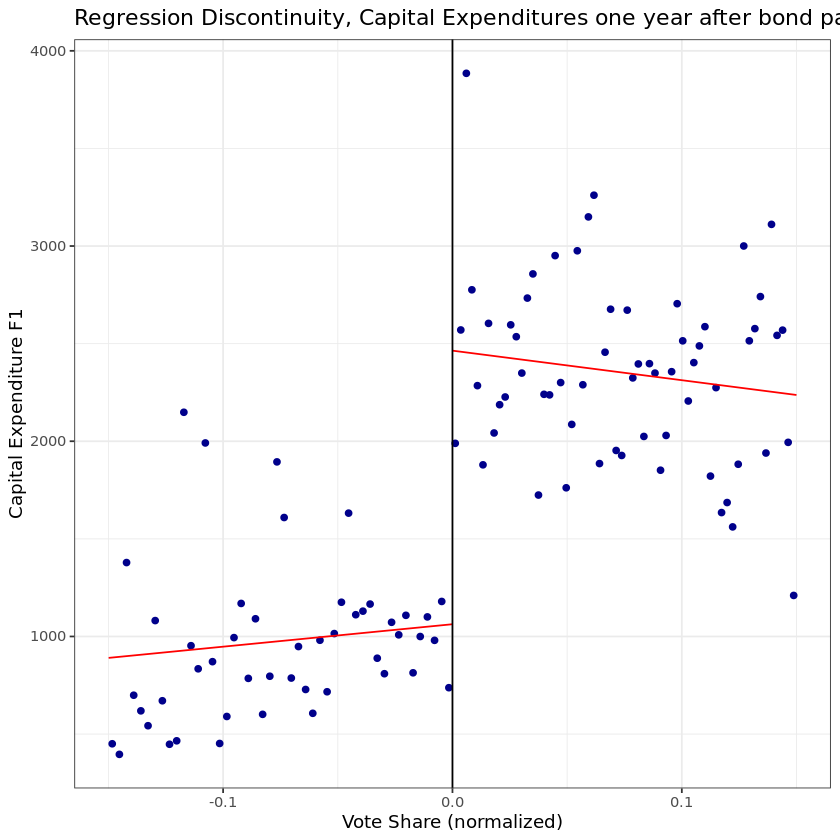

In [ ]:
## Hmm...

## Oh, right. Spending doesn't increase until one year after the bond is approved!
## But, the above is a good test of balance: no significant spending differences near 
## the threshold in the past. 
## This makes us less concerned that the l1cap_exp means aren't identical as we
## found earlier.

rdplot(y = narrow_data$f1cap_exp, x = narrow_data$margin, c=0, p=1, 
       x.label = "Vote Share (normalized)", 
       y.label = "Capital Expenditure F1", 
       title = "Regression Discontinuity, Capital Expenditures one year after bond passage")

Can we estimate the RDD causal effect from the figure? How?

Try plotting these figures for some other variables, such as `f1noncap_exp` and also for years further into the future (f2, f3, etc).

What did you find that was interesting?